(array([ 2.,  1.,  1.,  0.,  4.,  2.,  4.,  2.,  1.,  7.,  4.,  2.,  1.,
         8.,  5.,  8.,  7.,  4., 11., 14.,  6., 12., 11., 22., 18., 12.,
        20., 13., 21., 25., 26., 21., 30., 24., 30., 22., 34., 28., 28.,
        38., 19., 24., 35., 26., 27., 24., 24., 26., 21., 26., 25., 21.,
        17., 13., 12., 14., 12., 13.,  6.,  6., 15., 13.,  4.,  4.,  6.,
         0.,  4.,  5.,  6.,  2.,  4.,  3.,  0.,  1.,  3.,  2.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.21761869, 0.22486482, 0.23211095, 0.23935707, 0.2466032 ,
        0.25384933, 0.26109545, 0.26834158, 0.2755877 , 0.28283383,
        0.29007996, 0.29732608, 0.30457221, 0.31181834, 0.31906446,
        0.32631059, 0.33355671, 0.34080284, 0.34804897, 0.35529509,
        0.36254122, 0.36978735, 0.37703347, 0.3842796 , 0.39152572,
        0.39877185, 0.40601798, 0.4132641 , 0.42051023, 0.42775636,
        0.43500248, 0.4422

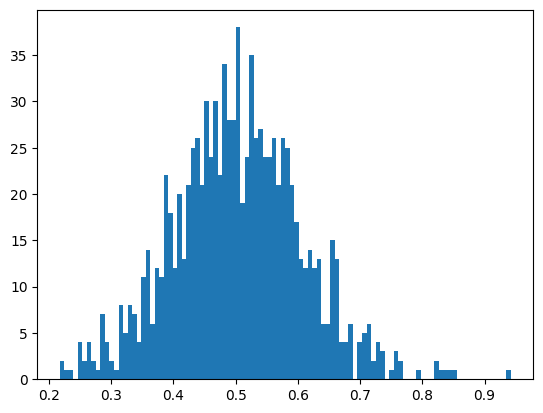

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of agents
N = 1000

# Wealth
wealth_arr = abs(np.random.normal(0.5, 0.1, N))
plt.hist(wealth_arr, bins=100)  

In [2]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

gini(wealth_arr)

np.float64(0.11574720996874843)

In [3]:
from grid_search import run_model

df_model, df_agent = run_model({
    'num_steps':            100, 
    'wealth_arr':           wealth_arr[:100], 
    'fraction_stolen':      0.6, 
    'deterrence':           0.1
})

df_model

100%|██████████| 100/100 [00:00<00:00, 115.67it/s]


,crime_rate,gini_coef
0,0.00,0.117943
1,0.20,0.117943
2,0.44,0.185179
3,0.68,0.294520
4,0.82,0.405447
...,...,...
95,1.00,0.635805
96,1.00,0.672120
97,1.00,0.688383
98,1.00,0.690919


In [4]:
df_agent

criminal    wealth
Step AgentID                    
0    0           False  0.578895
     1           False  0.584812
     2           False  0.353533
     3           False  0.515349
     4           False  0.750654
...                ...       ...
99   41           True  0.380568
     82           True  0.000000
     51           True  0.481861
     99           True  0.000000
     36           True  0.000000

[10000 rows x 2 columns]

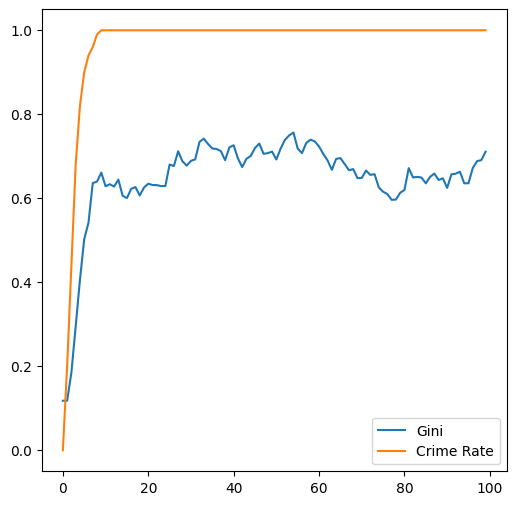

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])
ax.plot(df_model.index, df_model['gini_coef'], label='Gini')
ax.plot(df_model.index, df_model['crime_rate'], label='Crime Rate')
ax.legend()

In [7]:
from grid_search import run_grid_search

results = run_grid_search({
    'num_steps':            [100], 
    'wealth_arr':           [wealth_arr[:100]], 
    'fraction_stolen':      np.arange(0.1, 1.0, 0.1),
    'deterrence':           np.arange(0.1, 1.0, 0.1) 
})

results

Run 1/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 146.14it/s]


Done.

Run 2/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 139.47it/s]


Done.

Run 3/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 120.65it/s]


Done.

Run 4/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 153.39it/s]


Done.

Run 5/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 200.19it/s]


Done.

Run 6/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 129.17it/s]


Done.

Run 7/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 121.05it/s]


Done.

Run 8/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 172.21it/s]


Done.

Run 9/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 150.16it/s]


Done.

Run 10/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 109.84it/s]


Done.

Run 11/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 146.22it/s]


Done.

Run 12/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 172.20it/s]


Done.

Run 13/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 122.54it/s]


Done.

Run 14/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 171.75it/s]


Done.

Run 15/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 184.85it/s]


Done.

Run 16/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 171.62it/s]


Done.

Run 17/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 127.71it/s]


Done.

Run 18/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 149.36it/s]


Done.

Run 19/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 191.56it/s]


Done.

Run 20/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 144.23it/s]


Done.

Run 21/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 171.43it/s]


Done.

Run 22/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 198.51it/s]


Done.

Run 23/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 149.99it/s]


Done.

Run 24/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 132.05it/s]


Done.

Run 25/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 168.62it/s]


Done.

Run 26/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 199.43it/s]


Done.

Run 27/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 147.93it/s]


Done.

Run 28/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 137.56it/s]


Done.

Run 29/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 190.18it/s]


Done.

Run 30/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 136.78it/s]


Done.

Run 31/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 122.10it/s]


Done.

Run 32/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 205.32it/s]


Done.

Run 33/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 165.51it/s]


Done.

Run 34/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 166.27it/s]


Done.

Run 35/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 113.81it/s]


Done.

Run 36/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 144.02it/s]


Done.

Run 37/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 181.43it/s]


Done.

Run 38/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 180.60it/s]


Done.

Run 39/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 133.39it/s]


Done.

Run 40/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 193.94it/s]


Done.

Run 41/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 192.17it/s]


Done.

Run 42/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 110.47it/s]


Done.

Run 43/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 145.67it/s]


Done.

Run 44/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 197.79it/s]


Done.

Run 45/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 159.01it/s]


Done.

Run 46/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 115.44it/s]


Done.

Run 47/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 155.56it/s]


Done.

Run 48/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 164.72it/s]


Done.

Run 49/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 111.41it/s]


Done.

Run 50/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 110.28it/s]


Done.

Run 51/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 139.47it/s]


Done.

Run 52/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 120.34it/s]


Done.

Run 53/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 152.52it/s]


Done.

Run 54/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 162.87it/s]


Done.

Run 55/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 155.96it/s]


Done.

Run 56/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 162.67it/s]


Done.

Run 57/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 166.79it/s]


Done.

Run 58/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 194.35it/s]


Done.

Run 59/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 151.15it/s]


Done.

Run 60/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 185.93it/s]


Done.

Run 61/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 157.37it/s]


Done.

Run 62/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 202.06it/s]


Done.

Run 63/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 166.09it/s]


Done.

Run 64/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 177.56it/s]


Done.

Run 65/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 197.50it/s]


Done.

Run 66/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 171.20it/s]


Done.

Run 67/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 167.24it/s]


Done.

Run 68/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 148.15it/s]


Done.

Run 69/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 197.61it/s]


Done.

Run 70/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 192.40it/s]


Done.

Run 71/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 167.25it/s]


Done.

Run 72/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 190.06it/s]


Done.

Run 73/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 197.29it/s]


Done.

Run 74/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 165.20it/s]


Done.

Run 75/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 153.22it/s]


Done.

Run 76/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 190.49it/s]


Done.

Run 77/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 185.54it/s]


Done.

Run 78/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 199.16it/s]


Done.

Run 79/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 178.43it/s]


Done.

Run 80/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 144.49it/s]


Done.

Run 81/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 103.47it/s]


Done.



[{'run_id': 0,
  'param': {'num_steps': 100,
   'wealth_arr': array([0.57889458, 0.58481235, 0.35353269, 0.51534923, 0.75065365,
          0.42164657, 0.50453378, 0.44120798, 0.45139205, 0.44832956,
          0.48568878, 0.59042052, 0.32863577, 0.54100548, 0.57982768,
          0.52286022, 0.38125275, 0.51759391, 0.5269426 , 0.60302187,
          0.54531167, 0.56272091, 0.71851138, 0.46194726, 0.50472901,
          0.3382222 , 0.38706261, 0.47420454, 0.5022786 , 0.62311807,
          0.57593102, 0.56951827, 0.33464512, 0.50608774, 0.6469442 ,
          0.4008369 , 0.46204879, 0.48086791, 0.58507336, 0.4552834 ,
          0.52451939, 0.56512254, 0.54565142, 0.42270326, 0.41593545,
          0.52846958, 0.49056449, 0.60411386, 0.63125646, 0.55619472,
          0.57134   , 0.6534013 , 0.28829861, 0.62140665, 0.4683121 ,
          0.68397035, 0.83456076, 0.49433863, 0.48001736, 0.40602749,
          0.457265  , 0.41333963, 0.43359668, 0.45456991, 0.50045655,
          0.47040255, 0.2703190

In [8]:
import pandas as pd
pd.DataFrame(results).set_index('run_id')

,param,df_model,df_agent
run_id,,,
0,"{'num_steps': 100, 'wealth_arr': [0.5788945812...",crime_rate gini_coef 0 0.00 0.1...,criminal wealth Step AgentID ...
1,"{'num_steps': 100, 'wealth_arr': [0.5788945812...",crime_rate gini_coef 0 0.00 0.1...,criminal wealth Step AgentID ...
2,"{'num_steps': 100, 'wealth_arr': [0.5788945812...",crime_rate gini_coef 0 0.00 0.1...,criminal wealth Step AgentID ...
3,"{'num_steps': 100, 'wealth_arr': [0.5788945812...",crime_rate gini_coef 0 0.00 0.1...,criminal wealth Step AgentID ...
4,"{'num_steps': 100, 'wealth_arr': [0.5788945812...",crime_rate gini_coef 0 0.00 0.1...,criminal wealth Step AgentID ...
...,...,...,...
76,"{'num_steps': 100, 'wealth_arr': [0.5788945812...",crime_rate gini_coef 0 0.00 0.1...,criminal wealth Step AgentID ...
77,"{'num_steps': 100, 'wealth_arr': [0.5788945812...",crime_rate gini_coef 0 0.0 0.1...,criminal wealth Step AgentID ...
78,"{'num_steps': 100, 'wealth_arr': [0.5788945812...",crime_rate gini_coef 0 0.0 0.1...,criminal wealth Step AgentID ...


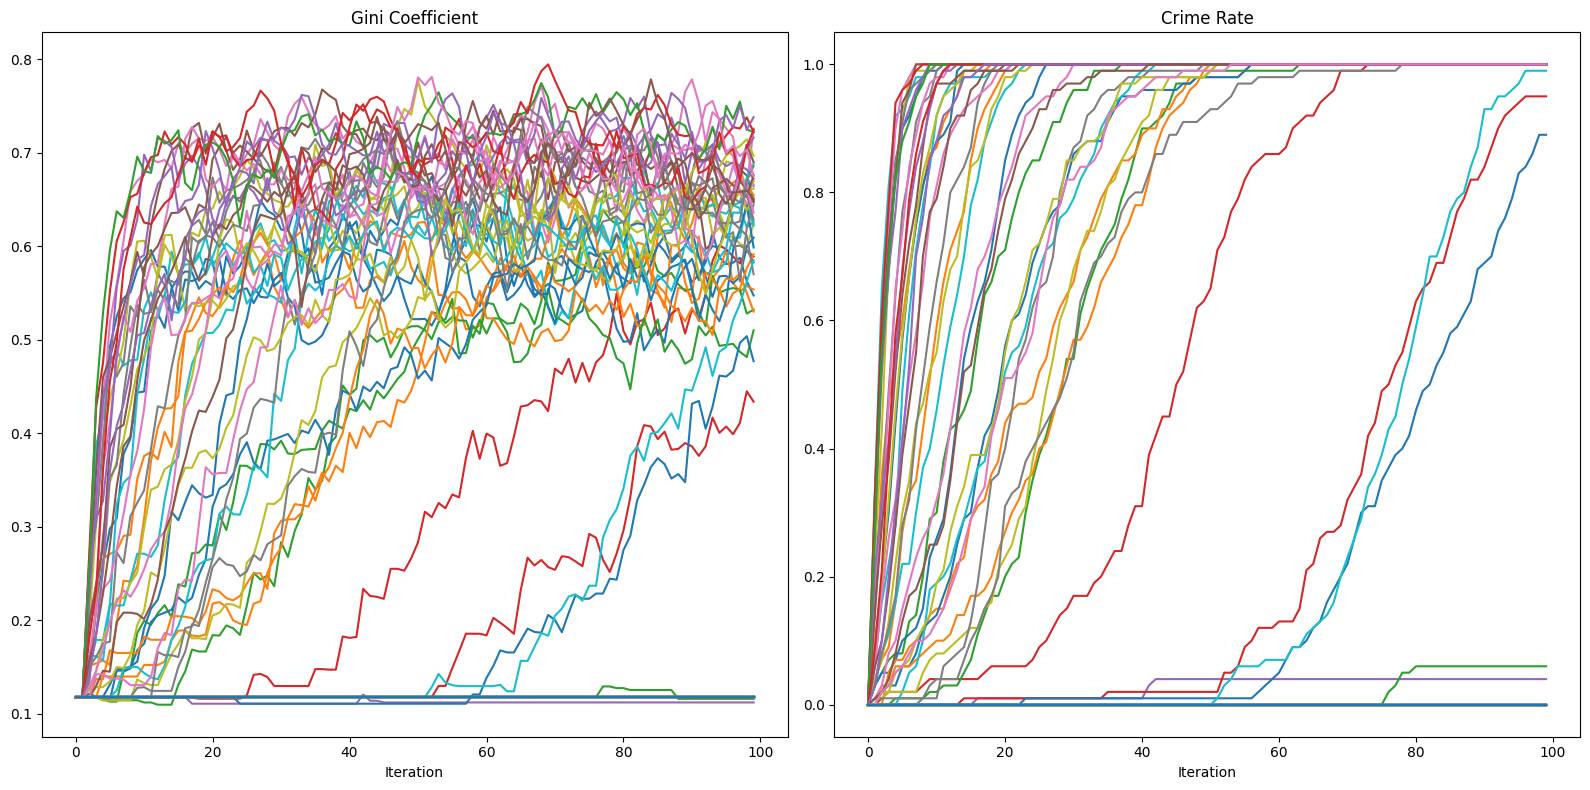

In [22]:
fig, ax = plt.subplots(ncols = 2, figsize=[16, 8])

for run_data in results:
    run_id = run_data['run_id']
    params = run_data['param']
    df_model = run_data['df_model']
    #df_agent = run_data['df_agent']
    ax[0].plot(df_model.index, df_model['gini_coef'], label=f'Run {run_id}')
    ax[1].plot(df_model.index, df_model['crime_rate'], label=f'Run {run_id}')

ax[0].set_title('Gini Coefficient')
ax[1].set_title('Crime Rate')
ax[0].set_xlabel('Iteration')
ax[1].set_xlabel('Iteration')
fig.tight_layout()
#ax.legend()